<a href="https://colab.research.google.com/github/Nikita-devel/DS_Hw10/blob/main/DS_Mw10-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Training model with configuration: {'filters': [32, 64], 'kernels': [(3, 3), (3, 3)], 'pooling': [(2, 2), (2, 2)], 'dense_units': 64}
Epoch 1/20
469/469 [==============================] - 66s 128ms/step - loss: 0.5650 - accuracy: 0.7965 - val_loss: 0.4224 - val_accuracy: 0.8509
Epoch 2/20
469/469 [==============================] - 45s 96ms/step - loss: 0.3619 - accuracy: 0.8718 - val_loss: 0.3495 - val_accuracy: 0.8729
Epoch 3/20
469/469 [==============================] - 47s 99ms/step - loss: 0.3191 - accuracy: 0.8851 - val_loss: 0.3244 - val_accuracy: 0.8824
Epoch 4/20
469/469 [==============================] - 46s 98ms/step - loss: 0.2907 - accuracy: 0.8953 - val_loss: 0.3171 - val_accuracy: 0.8861
Epoch 5/20
469/469 [==============================] - 45s 96ms/step - loss: 0.2698 - accuracy: 0.9024 - val_loss: 0.3015 - val_accuracy: 0.8922
Epoch 6/20
469/469 [==============================] - 45s 95ms/step - loss: 0.2504

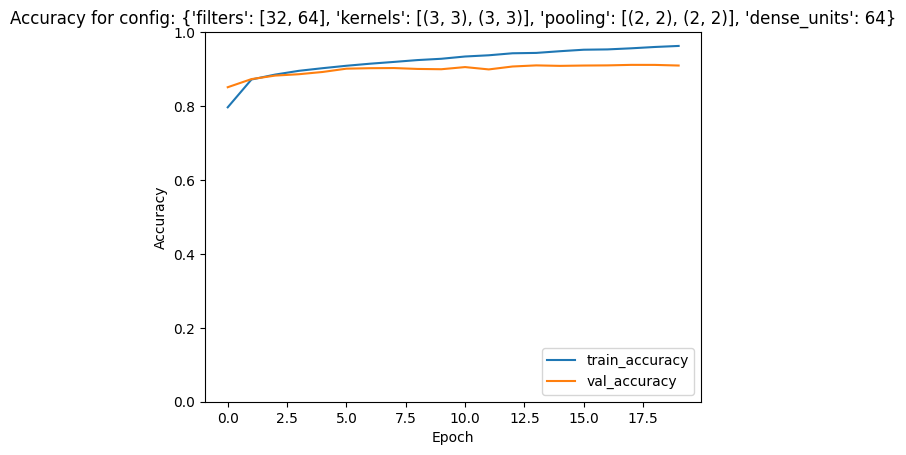

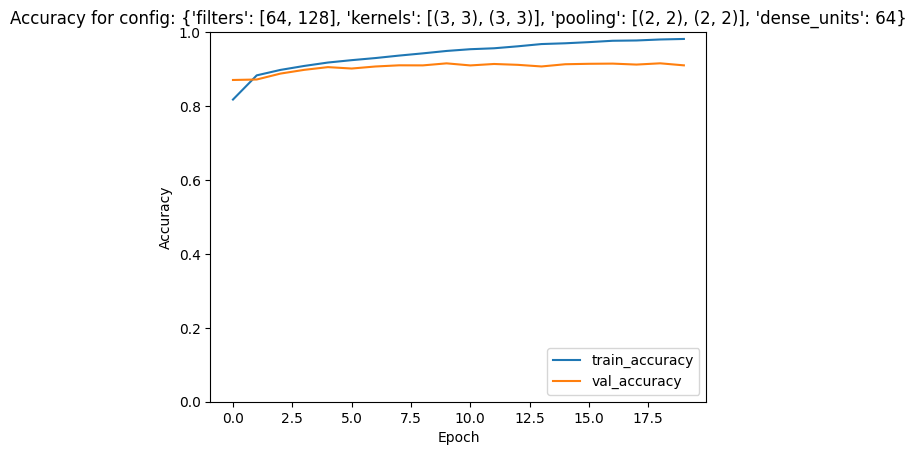

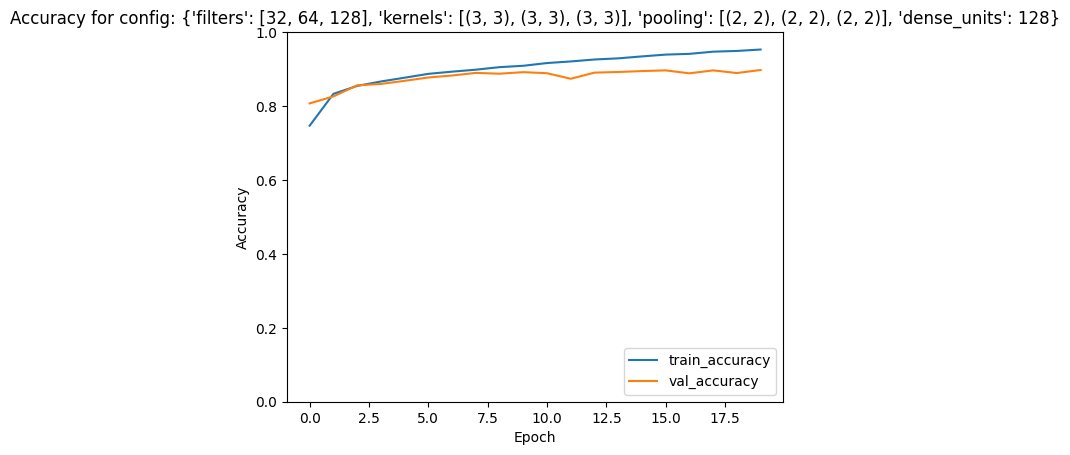

In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Формування тренувального та тестового датасетів
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Створення та навчання моделі згорткової нейронної мережі
def train_cnn_model(model, optimizer='adam', epochs=20, batch_size=128):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Test Accuracy:", test_acc)

    return history

# Можливі конфігурації моделі
configs = [
    {'filters': [32, 64], 'kernels': [(3, 3), (3, 3)], 'pooling': [(2, 2), (2, 2)], 'dense_units': 64},
    {'filters': [64, 128], 'kernels': [(3, 3), (3, 3)], 'pooling': [(2, 2), (2, 2)], 'dense_units': 64},
    {'filters': [32, 64, 128], 'kernels': [(3, 3), (3, 3), (3, 3)], 'pooling': [(2, 2), (2, 2), (2, 2)], 'dense_units': 128},
]

# Експерименти з різними конфігураціями моделі
results = []

for config in configs:
    model = Sequential()
    model.add(Conv2D(config['filters'][0], config['kernels'][0], activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(config['pooling'][0]))
    model.add(Conv2D(config['filters'][1], config['kernels'][1], activation='relu'))
    model.add(MaxPooling2D(config['pooling'][1]))
    if len(config['filters']) > 2:
        model.add(Conv2D(config['filters'][2], config['kernels'][2], activation='relu'))
        model.add(MaxPooling2D(config['pooling'][2]))
    model.add(Flatten())
    model.add(Dense(config['dense_units'], activation='relu'))
    model.add(Dense(10, activation='softmax'))

    print(f"Training model with configuration: {config}")
    history = train_cnn_model(model)

    results.append({'config': config, 'history': history})

# Візуалізація результатів
for result in results:
    plt.plot(result['history'].history['accuracy'], label='train_accuracy')
    plt.plot(result['history'].history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title(f'Accuracy for config: {result["config"]}')
    plt.legend(loc='lower right')
    plt.show()
